# Numerical Solutions to the Diffusion Eqaution in 1-D  

## Mathematical Problem
The diffusion equation in one dimmesion ($x$) is   

\begin{align}
  \frac{\partial u}{\partial t}  =  \kappa \frac{\partial^2 u}{\partial x^2} . 
\end{align}

The parabolic equation is simple, but a useful test case for numerical insights into the solutions of parabolic equations. To solve this equation, numerically or analytically, we need an inital condition at $t_0$, 
\begin{align}
u(x,t_0) = \eta(x)
\end{align}
and boundary conditions 
\begin{align}
\begin{aligned}
u(0,t) &= g_0(t) \;\; \text{for} \;\; t>0\\
u(1,t) &= g_1(t) \;\; \text{for} \;\; t>0\\
\end{aligned}
\end{align}
in this case Dirichlet conditions on the domain $0 \leq x \leq 1$. 


## Numerical Approach 

We will aplly finite differences on a discrete grid with grid points $(x_i, t_j)$ where
\begin{align}
  x_i = i h && t_j = j k. 
\end{align}
Here $h = \Delta x$ is the grid cell spacing and $k = \Delta t$ is the time step, with $U^i_j \approx u(x_i, t_j)$ is numerical approximation at $(x_i, t_j)$.

A classical forward in time one-step approach for solving the diffusion equation is the _Crank-Nicolson_ method  

\begin{align}  
  \frac{U_i^{j+1} - U_i^{j}}{\Delta t} &= \kappa \frac{1}{2} \left( D_{xx} U_i^{j+1} + D_{xx} U_i^{j}\right)
\end{align}  

where $D_{xx}$ is the discrete differential operator for the second derivative. Expanding the second derivative with centered differences   

\begin{align}  
  \frac{U_i^{j+1} - U_i^{j}}{\Delta t} &= \frac{\kappa}{2 \Delta x^2} \left( U_{i+1}^{j+1} - 2U_i^{j+1} + U_{i-1}^{j+1} + U_{i+1}^{j} - 2 U_{i}^{j} + U_{i-1}^{j}\right)
\end{align}   

that can be rearranged as 

\begin{align}  
  U_i^{j+1} &= U_i^{j} + \frac{\kappa \Delta t}{2 \Delta x^2} \left( U_{i+1}^{j+1} - 2U_i^{j+1} + U_{i-1}^{j+1} + U_{i+1}^{j} - 2 U_{i}^{j} + U_{i-1}^{j}\right)
\end{align}  

or   

\begin{align}  
  -r U_{i-1}^{j+1} + (1+2r)\;U_i^{j+1} -r U_{i+1}^{j+1}&= r U_{i-1}^{j} + (1-2r)\;U_i^{j} + r U_{i+1}^{j}
  \label{eq:unp1l}
\end{align}
  
where $ r = \left. \kappa \Delta t \middle/ 2 \Delta x^2 \right.$. This is an _implicit_ method since the solution for $U_n^{j+1}$ depends on both $U_n^{j}$ and itself ($U_n^{j+1}$). The method gives a tridiagonal system of equations to solve for all $U_n^{j+1}$ values simultaneously. Equation \ref{eq:unp1l} above holds for the interior points $i = 2, \ldots, i-1$, but not on the boundaries $i = 1,L$. We must look at the the discrete equation in more detail at those points. At $i=1$   

\begin{align}  
 -r \underbrace{U_{0}^{j+1}}_{g_0( {t_{j+1}} )} + (1+2r)\;U_1^{j+1} -r U_{2}^{j+1} &= r \underbrace{U_{0}^{j}}_{g_0( {t_{j}} )} + (1-2r)\;U_1^{j} + r U_{2}^{j}
\end{align}

that simplifies to  

\begin{align}
-r U_{2}^{j+1} + (1+2r)\; U_1^{j+1} =  r \left(g_0( {t_{j+1}} ) + g_0( {t_{j}} )\right) + (1-2r)\;U_1^{j} + r U_{2}^{j} 
\end{align}  

the same can be done for the $i=L$. Using both boundary conditions the system of equations in matrix form is 

$$
\begin{bmatrix}
    (1+2 r)  & -r &  &  &  &  \\
    -r & (1+2 r) & -r &  &  &  \\
     & -r & (1+2 r) & -r &  &   \\
     &  & \ddots & \ddots & \ddots &  \\
     &  & & -r & (1+2 r) & -r \\
     &  & &    & -r & (1+2 r) 
    \end{bmatrix}
    \begin{bmatrix}
    U_1^{n+1} \\
    U_2^{n+1} \\
    U_3^{n+1} \\
    \vdots \\
    U_{m-1}^{n+1} \\
    U_{m}^{n+1}
    \end{bmatrix} =
    \begin{bmatrix}
    r \left(g_0( {t_{j+1}} ) + g_0( {t_{j}} )\right) + (1-2r)\;U_1^{j} + r U_{2}^{j}  \\
    r U_{1}^{j} + (1-2r)\;U_2^{j} + r U_{3}^{j} \\
    r U_{2}^{j} + (1-2r)\;U_{3}^{j} + r U_{4}^{j} \\
    \vdots \\
    r U_{m-2}^{j} + (1-2r)\;U_{m-1}^{j} + r U_{m}^{j} \\
    r U_{m-1}^{j} + (1-2r)\;U_{m}^{j} + r \left(g_1( {t_{j+1}} ) + g_1( {t_{j}} )\right)
    \end{bmatrix} .
$$

How to best solve this linear system of equations is a question worth diving deeper into. The linear system above is tridiagonal, meaning it only has enteries on the main-, sub-, and super- diagonal positions. A general linear system is typically of form $Ax = b$, where $A \in {\rm I\!R}^{M\times N}$, $b$ is known vector, and $x$ is the unkown vector in question (here $U_i^{j+1}$ for all $i$). The trivial way to solve this linear system is through matrix inversion 
$$
x = A^{-1}b
$$
which in an of it self is an ill-conditioned operation, but none the less takes $\cal{O}(n^3)$. But for a matrix to be invertible $M = N$ and therefore our number of spatial points must equal out timesteps which is severly limiting.  

Another naive solution might be Gaussian Elimination that also takes $\cal{O}(n^3)$. 

Since we are using an _implicit_ scheme, ones first thought might be to use an itterative solver, but we can exploit the fact that this matrix is tridiagonal and use the extremely efficent __Thomas algorithm__ with a complexity of $\cal{O}(n)$. 

## Python Implementation 


In [1]:
# Global
import sys 
import numpy as np 
from scipy import linalg as LA
import matplotlib.pyplot as plt

# Local
sys.path.append('../')
from advdiff.solvers import TDMA
from advdiff.plot import animation

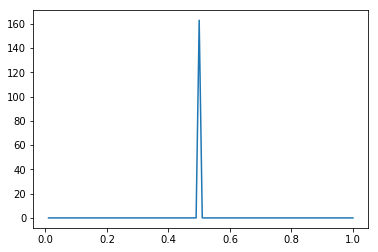

In [63]:

plt.plot(x,gauss_pulse(x,1e-3,κ=3e-3))

In [30]:
def gauss_pulse(x, t, κ, μ = 0.5):
    '''1-D Gaussian Curve
    
    Keyword arguments:
    σ -- σ^2 is the variance
    μ -- Mean (i.e. center) 
    '''
    return (4*κ*np.pi*t)**-0.5*np.exp(-(x-μ)**2/(4*κ*t))

########################################################
#################   Init. Constant   ###################
########################################################
κ  = 3e-6                  # Diffusivity 
L  = 1.                    # Domain Length 
nx = 100                   # Num. grid cells
dx = L/(nx-1)              # grid spacing

nt = 100                   # Num time steps
σ  = .75                   # courant number
dt = (σ*dx)**2/κ           # time step 

########################################################
##################   Init. Domain   ####################
########################################################
r  = (κ*dt)/(2*dx**2)      # matrix const.
x  = np.linspace(dx,L,nx)  # spatial grid
u  = np.zeros((nx,nt+1))   # solution array
u[:,0] = gauss(x)          # init. condition

# Mat. A
A = np.diagflat([[(1+2*r) for __ in range(nx)]]) + \
    np.diagflat([[  (-r)  for __ in range(nx-1)]],1) +\
    np.diagflat([[  (-r)  for __ in range(nx-1)]],-1)

# Mat. B
B = np.diagflat([[(1-2*r) for __ in range(nx)]]) + \
    np.diagflat([[  (r)   for __ in range(nx-1)]],1) +\
    np.diagflat([[  (r)   for __ in range(nx-1)]],-1)

########################################################
#################    Time stepping   ###################
########################################################
for t in range(nt):
    b     = B.dot(u[:,t])           # left vect.
    b[0]  = b[1]                    # boundary cond.
    b[-1] = b[-2]                   # boundary cond.
    u[:,t+1]  = TDMA(A,b).flatten() # itterative solv.
    u[0,t+1]  = u[1,t+1]            # boundary cond.
    u[-1,t+1] = u[-2,t+1]           # boundary cond.

In [3]:
simul = animation(1,1,x,u,nt,L)
simul.labels('x','conc.')
simul.animate()

In [4]:
mass = np.empty(u.shape[1])
for col in range(u.shape[1]):
    mass[col] = sum(u[:,col])